In [7]:
import heapq
from dataclasses import dataclass
from typing import List

@dataclass
class Item:
    index: int
    weight: int
    value: int

    def ratio(self):
        return self.value / self.weight

@dataclass
class Node:
    level: int
    value: int
    weight: int
    bound: float
    items: List[int]  # 1 = com item, 0 = sem item

def calculate_bound(node: Node, capacity: int, items: List[Item]) -> float:
    if node.weight >= capacity:
        return 0

    bound = node.value
    total_weight = node.weight
    i = node.level

    while i < len(items) and total_weight + items[i].weight <= capacity:
        total_weight += items[i].weight
        bound += items[i].value
        i += 1

    if i < len(items):
        bound += (capacity - total_weight) * items[i].ratio()

    return bound

def knapsack_bnb_bestfs(capacity: int, weights: List[int], values: List[int]):
    n = len(weights)
    items = [Item(i, weights[i], values[i]) for i in range(n)]
    items.sort(key=lambda x: x.ratio(), reverse=True)

    best_value = 0
    best_items = []

    # heap: (priority, node) - usamos -bound para max heap
    heap = []

    root = Node(level=0, value=0, weight=0, bound=0, items=[])
    root.bound = calculate_bound(root, capacity, items)
    heapq.heappush(heap, (-root.bound, root))

    tree = [("ROOT", root)]

    while heap:
        _, node = heapq.heappop(heap)

        if node.level == n:
            continue  # folha já processada

        # Filho COM o item atual
        item = items[node.level]
        with_node = Node(
            level=node.level + 1,
            value=node.value + item.value,
            weight=node.weight + item.weight,
            bound=0,
            items=node.items + [1]
        )
        with_node.bound = calculate_bound(with_node, capacity, items)

        if with_node.weight <= capacity:
            if with_node.value > best_value:
                best_value = with_node.value
                best_items = with_node.items[:]
            if with_node.bound > best_value:
                heapq.heappush(heap, (-with_node.bound, with_node))
                tree.append(("WITH", with_node))
            else:
                tree.append(("WITH (podado)", with_node))
        else:
            tree.append(("WITH (inviável)", with_node))

        # Filho SEM o item atual
        without_node = Node(
            level=node.level + 1,
            value=node.value,
            weight=node.weight,
            bound=0,
            items=node.items + [0]
        )
        without_node.bound = calculate_bound(without_node, capacity, items)

        if without_node.bound > best_value:
            heapq.heappush(heap, (-without_node.bound, without_node))
            tree.append(("W/O", without_node))
        else:
            tree.append(("W/O (podado)", without_node))

    # Saída final
    print("Melhor valor:", best_value)
    print("Itens selecionados (em ordem dos itens ordenados por valor/peso):", best_items)

    print("\nÁrvore de busca (em ordem de expansão):")
    for decision, node in tree:
        print(f"{decision:<16} | level={node.level}, val={node.value}, wt={node.weight}, ub={round(node.bound, 2)}, items={node.items}")

# Exemplo de uso
weights = [10, 7, 8, 4]
values = [100, 63, 56, 12]
capacity = 16

knapsack_bnb_bestfs(capacity, weights, values)


Melhor valor: 119
Itens selecionados (em ordem dos itens ordenados por valor/peso): [0, 1, 1]

Árvore de busca (em ordem de expansão):
ROOT             | level=0, val=0, wt=0, ub=154.0, items=[]
WITH             | level=1, val=100, wt=10, ub=154.0, items=[1]
W/O              | level=1, val=0, wt=0, ub=122.0, items=[0]
WITH (inviável)  | level=2, val=163, wt=17, ub=0, items=[1, 1]
W/O              | level=2, val=100, wt=10, ub=142.0, items=[1, 0]
WITH (inviável)  | level=3, val=156, wt=18, ub=0, items=[1, 0, 1]
W/O              | level=3, val=100, wt=10, ub=112, items=[1, 0, 0]
WITH             | level=2, val=63, wt=7, ub=122.0, items=[0, 1]
W/O (podado)     | level=2, val=0, wt=0, ub=68, items=[0, 0]
WITH             | level=3, val=119, wt=15, ub=122.0, items=[0, 1, 1]
W/O (podado)     | level=3, val=63, wt=7, ub=75, items=[0, 1, 0]
WITH (inviável)  | level=4, val=131, wt=19, ub=0, items=[0, 1, 1, 1]
W/O (podado)     | level=4, val=119, wt=15, ub=119, items=[0, 1, 1, 0]
WITH (podado)  

In [8]:
palavras = {"arid", "dash", "drain", "heard", "lost", "nose", "shun", "slate", "snare", "thread"}

# Mapear palavras para conjuntos de letras
subconjuntos = {p: set(p) for p in palavras}

# Universo de letras únicas
U = set().union(*subconjuntos.values())

# Solução de palavras escolhidas
cobertura = []

while U:
    # Escolhe a palavra que cobre mais letras ainda não cobertas
    melhor = max(subconjuntos.items(), key=lambda item: len(item[1] & U))[0]
    cobertura.append(melhor)
    U -= subconjuntos[melhor]  # Remove letras cobertas
    del subconjuntos[melhor]   # Remove a palavra da lista de candidatos

print("Cobertura aproximada (set cover):", cobertura)


Cobertura aproximada (set cover): ['thread', 'lost', 'drain', 'shun']


In [9]:
! pip install networkx matplotlib

In [11]:
! pip install pygraphviz

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [54 lines of output]
      /home/luisalopescarvalhaes/.conda/envs/tpICD/lib/python3.8/site-packages/setuptools/_distutils/dist.py:261: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      running bdist_wheel
      running build
      running build_py
      creating build/lib.linux-x86_64-cpython-38/pygraphviz
      copying pygraphviz/__init__.py -> build/lib.linux-x86_64-cpython-38/pygraphviz
      copying pygraphviz/agraph.py -> build/lib.linux-x86_64-cpython-38/pygraphviz
      copying pygraphviz/testing.py -> build/lib.linux-x86_64-cpython-38/pygraphviz
      copying pygraphviz/graphviz.py -> build/lib.linux-x86_64-cpython-38/pygraphviz
      copying pygraphviz/scraper.py -> build/lib.linux-x86_64-cpython-38/pygraphviz
      creating build/lib.linux-x86_64-cpython-38/pygraphviz/tests
 

Melhor valor: 119
Itens selecionados (ordem ordenada): [0, 1, 1]


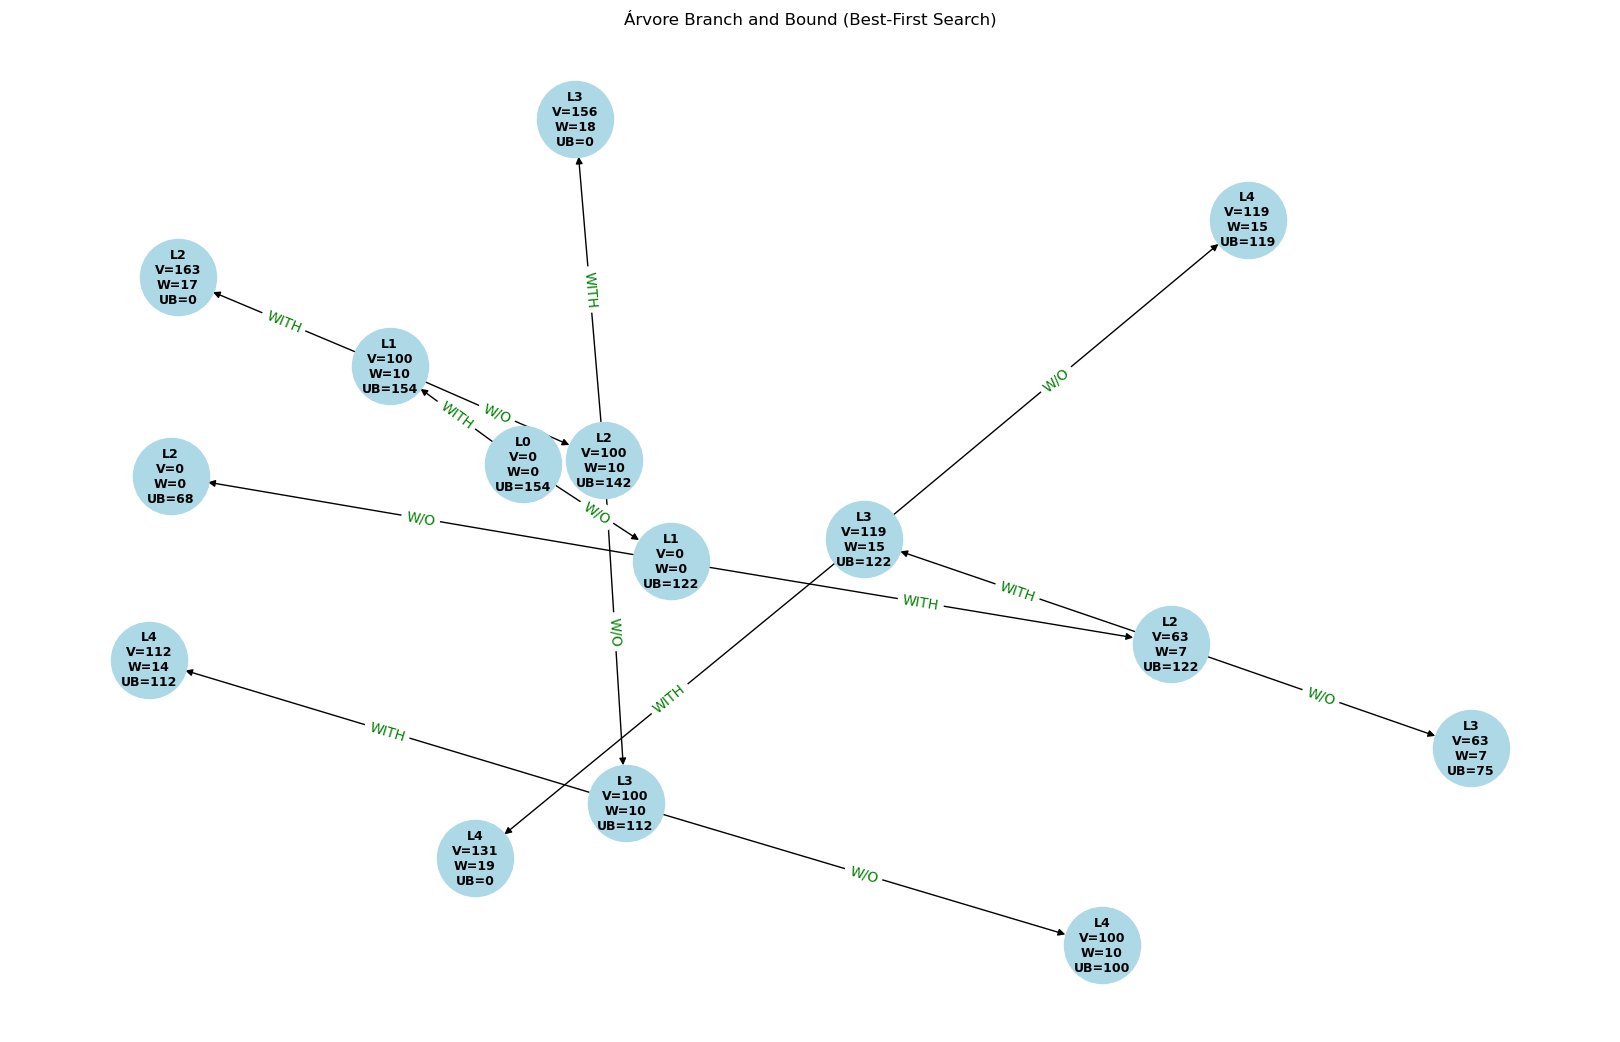

In [13]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List

@dataclass
class Item:
    index: int
    weight: int
    value: int

    def ratio(self):
        return self.value / self.weight

@dataclass
class Node:
    id: int             # identificador único
    level: int
    value: int
    weight: int
    bound: float
    items: List[int]  # 1 = com item, 0 = sem item

def calculate_bound(node: Node, capacity: int, items: List[Item]) -> float:
    if node.weight >= capacity:
        return 0

    bound = node.value
    total_weight = node.weight
    i = node.level

    while i < len(items) and total_weight + items[i].weight <= capacity:
        total_weight += items[i].weight
        bound += items[i].value
        i += 1

    if i < len(items):
        bound += (capacity - total_weight) * items[i].ratio()

    return bound

def knapsack_bnb_bestfs_visual(capacity: int, weights: List[int], values: List[int]):
    n = len(weights)
    items = [Item(i, weights[i], values[i]) for i in range(n)]
    items.sort(key=lambda x: x.ratio(), reverse=True)

    best_value = 0
    best_items = []

    heap = []
    G = nx.DiGraph()
    node_counter = [0]

    def new_node(level, value, weight, items_list):
        node = Node(
            id=node_counter[0],
            level=level,
            value=value,
            weight=weight,
            bound=0,
            items=items_list
        )
        node.bound = calculate_bound(node, capacity, items)
        node_counter[0] += 1
        return node

    root = new_node(0, 0, 0, [])
    heapq.heappush(heap, (-root.bound, root))
    G.add_node(root.id, label=f"L{root.level}\nV={root.value}\nW={root.weight}\nUB={int(root.bound)}")

    while heap:
        _, node = heapq.heappop(heap)

        if node.level == n:
            continue

        current_item = items[node.level]

        # Filho COM item
        with_node = new_node(
            level=node.level + 1,
            value=node.value + current_item.value,
            weight=node.weight + current_item.weight,
            items_list=node.items + [1]
        )
        G.add_node(with_node.id, label=f"L{with_node.level}\nV={with_node.value}\nW={with_node.weight}\nUB={int(with_node.bound)}")
        G.add_edge(node.id, with_node.id, label="WITH")

        if with_node.weight <= capacity:
            if with_node.value > best_value:
                best_value = with_node.value
                best_items = with_node.items[:]
            if with_node.bound > best_value:
                heapq.heappush(heap, (-with_node.bound, with_node))

        # Filho SEM item
        without_node = new_node(
            level=node.level + 1,
            value=node.value,
            weight=node.weight,
            items_list=node.items + [0]
        )
        G.add_node(without_node.id, label=f"L{without_node.level}\nV={without_node.value}\nW={without_node.weight}\nUB={int(without_node.bound)}")
        G.add_edge(node.id, without_node.id, label="W/O")

        if without_node.bound > best_value:
            heapq.heappush(heap, (-without_node.bound, without_node))

    print("Melhor valor:", best_value)
    print("Itens selecionados (ordem ordenada):", best_items)

    # --- Visualização ---
    pos = nx.spring_layout(G, seed=42)  # layout alternativo sem pygraphviz
    labels = nx.get_node_attributes(G, 'label')
    edge_labels = nx.get_edge_attributes(G, 'label')

    plt.figure(figsize=(16, 10))
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000,
            node_color='lightblue', font_size=9, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')
    plt.title("Árvore Branch and Bound (Best-First Search)")
    plt.axis('off')
    plt.show()

# Exemplo de uso
weights = [10, 7, 8, 4]
values = [100, 63, 56, 12]
capacity = 16

knapsack_bnb_bestfs_visual(capacity, weights, values)
